# Import data

In [139]:
import json

with open('data/data2/AUD_USD-1588780800-H1-10000.json') as f:
    data = json.load(f)

print(data)

[{'Complete': True, 'Volume': 268, 'Time': 1537920000, 'O': 0.72482, 'H': 0.72554, 'L': 0.72461, 'C': 0.72518}, {'Complete': True, 'Volume': 881, 'Time': 1537923600, 'O': 0.72524, 'H': 0.7277, 'L': 0.72482, 'C': 0.72758}, {'Complete': True, 'Volume': 331, 'Time': 1537927200, 'O': 0.7276, 'H': 0.72832, 'L': 0.72735, 'C': 0.72772}, {'Complete': True, 'Volume': 215, 'Time': 1537930800, 'O': 0.72774, 'H': 0.72782, 'L': 0.72742, 'C': 0.72748}, {'Complete': True, 'Volume': 171, 'Time': 1537934400, 'O': 0.72748, 'H': 0.72748, 'L': 0.72682, 'C': 0.72682}, {'Complete': True, 'Volume': 227, 'Time': 1537938000, 'O': 0.72678, 'H': 0.72697, 'L': 0.72622, 'C': 0.72635}, {'Complete': True, 'Volume': 461, 'Time': 1537941600, 'O': 0.72632, 'H': 0.72671, 'L': 0.72586, 'C': 0.72606}, {'Complete': True, 'Volume': 459, 'Time': 1537945200, 'O': 0.72604, 'H': 0.72652, 'L': 0.72524, 'C': 0.72548}, {'Complete': True, 'Volume': 224, 'Time': 1537948800, 'O': 0.72542, 'H': 0.72604, 'L': 0.72532, 'C': 0.72591}, {'

In [140]:
import pandas as pd

# List of dicts to Dict of lists
d = {r: [dic[r] for dic in data] for r in data[0]}

df = pd.DataFrame(d)
df

,Complete,Volume,Time,O,H,L,C
0,True,268,1537920000,0.72482,0.72554,0.72461,0.72518
1,True,881,1537923600,0.72524,0.72770,0.72482,0.72758
2,True,331,1537927200,0.72760,0.72832,0.72735,0.72772
3,True,215,1537930800,0.72774,0.72782,0.72742,0.72748
4,True,171,1537934400,0.72748,0.72748,0.72682,0.72682
...,...,...,...,...,...,...,...
9995,True,338,1588762800,0.64378,0.64447,0.64338,0.64426
9996,True,887,1588766400,0.64430,0.64474,0.64304,0.64446
9997,True,1003,1588770000,0.64450,0.64528,0.64370,0.64437
9998,True,1544,1588773600,0.64434,0.64458,0.64236,0.64295


In [141]:
import numpy as np

diff = list(df['O'].diff()[1:])
diff.append(np.nan)

# Label used for feature selection is when V_t=1 - V_t=0 > 0
df['d_O'] = diff
df['d_O_sign'] = df['d_O'] > 0

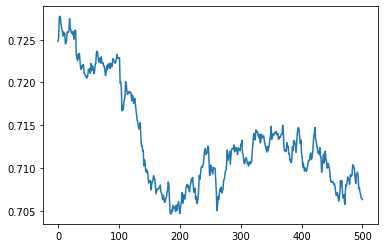

In [165]:
import matplotlib.pyplot as plt

df_dev = df.loc[:500]
plt.plot(df_dev['O'])
plt.show()

# Preprocessing

Rolling window + Normalisation

In [143]:
from skimage.util import view_as_windows

window_size = 20
traj_mat = view_as_windows(np.array(df_dev['O']), window_shape=window_size)
print(traj_mat.shape)
traj_mat

(982, 20)


array([[0.72482, 0.72524, 0.7276 , ..., 0.72585, 0.72611, 0.72746],
       [0.72524, 0.7276 , 0.72774, ..., 0.72611, 0.72746, 0.72637],
       [0.7276 , 0.72774, 0.72748, ..., 0.72746, 0.72637, 0.72611],
       ...,
       [0.7264 , 0.7261 , 0.72616, ..., 0.72528, 0.72514, 0.72406],
       [0.7261 , 0.72616, 0.72578, ..., 0.72514, 0.72406, 0.72476],
       [0.72616, 0.72578, 0.72628, ..., 0.72406, 0.72476, 0.72528]])

In [144]:
from sklearn.preprocessing import normalize

traj_mat = normalize(traj_mat)

# Models

In [7]:
from sklearn.model_selection import train_test_split

X = np.expand_dims(traj_mat[:,:-1], axis=2)
y = traj_mat[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Using TensorFlow backend.


Epoch 1/30
65/65 [==============================] - 1s 13ms/step - loss: 0.2348
Epoch 2/30
65/65 [==============================] - 0s 1ms/step - loss: 0.1936
Epoch 3/30
65/65 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 4/30
65/65 [==============================] - 0s 2ms/step - loss: 0.1101
Epoch 5/30
65/65 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 6/30
65/65 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 7/30
65/65 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 8/30
65/65 [==============================] - 0s 864us/step - loss: 0.0070
Epoch 9/30
65/65 [==============================] - 0s 921us/step - loss: 0.0162
Epoch 10/30
65/65 [==============================] - 0s 846us/step - loss: 0.0045
Epoch 11/30
65/65 [==============================] - 0s 883us/step - loss: 0.0160
Epoch 12/30
65/65 [==============================] - 0s 953us/step - loss: 0.0068
Epoch 13/30
65/65 [===================

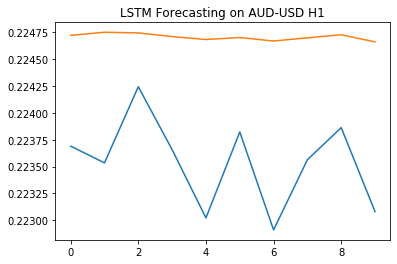

In [8]:
"""LSTM Forecasting"""
from model.lstm_forecast import LSTM_Forecast

timesteps = window_size - 1
model = LSTM_Forecast(timesteps=timesteps, n_features=1)
model.fit(X_train, y_train, X_test, y_test, epochs=30, batch_size=32)
y_pred = model.predict(X_test)

plt.title("LSTM Forecasting on AUD-USD H1")
plt.plot(y_test[:10])
plt.plot(y_pred.squeeze()[:10])
plt.show()

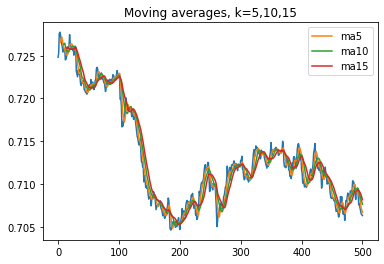

In [196]:
"""Moving average convergence divergence (MACD)

Moving Average Convergence Divergence (MACD) is a trend-following
momentum indicator that shows the relationship between two
moving averages of a security’s price. The MACD is calculated by
subtracting the 26-period Exponential Moving Average (EMA) from
the 12-period EMA.

Ref: https://www.investopedia.com/terms/m/macd.asp
"""
X = df_dev['O']

ma5 = X.rolling(window=5).mean()
ma10 = X.rolling(window=10).mean()
ma15 = X.rolling(window=15).mean()
plt.title("Moving averages, k=5,10,15")
plt.plot(X)
plt.plot(ma5, label='ma5')
plt.plot(ma10, label='ma10')
plt.plot(ma15, label='ma15')
plt.legend(loc='upper right')
plt.show()

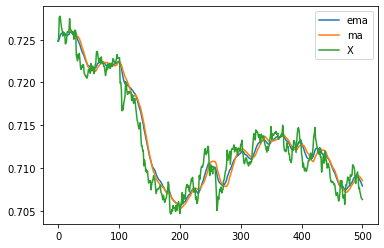

In [197]:
"""Exponential moving average"""
X = df_dev['O']

k = 20
ema = X.ewm(span=k, adjust=False).mean()
ma = X.rolling(window=k).mean()
plt.plot(ema, label='ema')
plt.plot(ma, label='ma')
plt.plot(X, label='X')
plt.legend(loc='best')
plt.show()

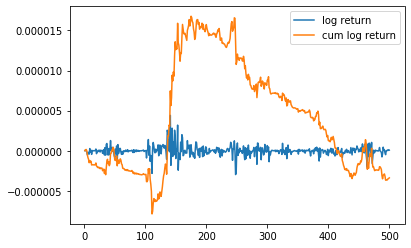

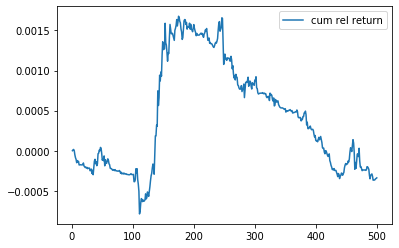

In [203]:
ema26 = X.ewm(span=26, adjust=False).mean()
ema12 = X.ewm(span=12, adjust=False).mean()

# d = X - ema
d = ema12 - ema26
d = d.shift(1)

log_return = d * np.log(X).diff()
cum_log_return = log_return.cumsum()
cum_rel_return = 100 * (np.exp(cum_log_return) - 1)

plt.plot(log_return, label="log return")
plt.plot(cum_log_return, label="cum log return")
plt.legend(loc='best')
plt.show()

plt.plot(cum_rel_return, label="cum rel return")
plt.legend(loc='best')
plt.show()

In [204]:
hours = cum_rel_return.shape[0]
days = hours / 24

total_return = cum_rel_return.iloc[-1]
avg_daily_return = (1 + total_return) ** (1 / days) - 1

print(f"Total return: {round(100*total_return, 4)}%")
print(f"Avg daily return: {round(100*avg_daily_return, 4)}%")

Total return: -0.0339%
Avg daily return: -0.0016%


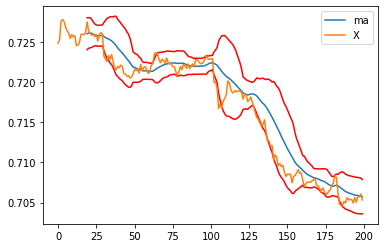

In [174]:
"""Bollinger Bands with MACD

Ref: https://www.investopedia.com/terms/b/bollingerbands.asp
"""
X = df_dev['O'][:200]

k = 20  # k-day sma
n = 2  # 2 std dev

ma = X.rolling(window=k).mean()
std = X.rolling(window=k).std()

b1 = ma + n * std
b2 = ma - n * std

plt.plot(b1, c='r')
plt.plot(b2, c='r')
plt.plot(ma, label='ma')
plt.plot(X, label='X')
plt.legend(loc='best')
plt.show()

# Performance

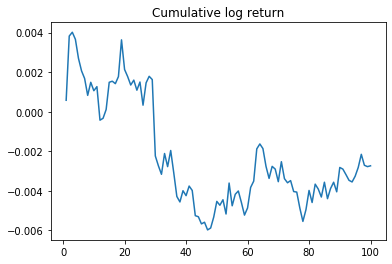

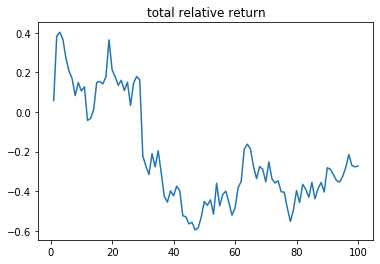

In [33]:
"""Percent change

Relative return:
r_relative(t) = (p(t) - p(t-1)) / p(t-1)

Log-return:
r(t) = log(p(t) / p(t-1))

Conversion between cumulative log return and total relative return:
c(t) = sum(r(t))
c_relative(t) = (p(t) - p(t0)) / p(t0)
c_relative(t) = e^(c(t)) - 1

Ref: https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/
"""
X = df_dev['O']

returns = X.pct_change(1)
log_returns = np.log(X).diff()

plt.title('Cumulative log return')
plt.plot(log_returns.cumsum())
plt.show()

plt.title('total relative return')
plt.plot(100*(np.exp(log_returns.cumsum()) - 1))
plt.show()